# Übung 1.1 - Lineare Regression am Beispiel Presshärten
VO Maschinelles Lernen in der Produktion, WS2020/21, Moritz von Unold, Richard Lux, Felix Soest

#### In diesem Notebook soll das Verfahren Lineare Regression anhand des Anwendungsbeispiels Presshärten geübt werden.

Ziel der Linerare Regression ist hier den Zusammenhang zwischen den 7 Prozess-Parametern und dem daraus resultierenden Ziel-Parameter (Bauteilhärte) zu bestimmen.

Die Erstellung eines linearen Regressionsmodells glieder sich in die 6 Schritte des Data-Minings:

![alt text](Daten/Prozess_Modellentwicklung_v2.png "Title")

#### 0. Bibliotheken importieren

#### 1. Daten erfassen
- Daten importieren

#### 2. Daten erkunden
- Daten tabellarisch darstellen
- Streudiagramme und Histogramme anzeigen

#### 3. Daten vorbereiten
- Daten in Trainings- und Testdaten aufteilen

#### 4. Modelle bilden (hier nur 1 Modell)
- Mögliche Hyperparameter (Modell-Parameter) anzeigen
- Modell erstellen (untrainiert)
- Modell anhand Trainingsdaten trainieren

#### 5. (Modelle validieren)
- Da nur ein Modell erstellt wird entfällt dieser Schritt

#### 6. Modell testen & anwenden
- Berechnung der Modellvorhersage auf den Testdaten
- Bewertung der Modellgüte mittels Graph (Y/Y_pred)
- Bewertung der Modellgüte mittles RMSE & MAE
- Erkenntnisse aus dem Modell/Nutzen

### 0. Bibliotheken importieren

In [1]:
# 0. Code-Block

# Importiere benötigte Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
%matplotlib inline

### 1. Daten erfassen - Daten importieren

TODO:
- Wähle eine Zahl zwischen 1 und 100 für die Generierung deiner spezifischen Zufallszahlen  (1. Code-Block - Zeile 8)

(Wähle für alle Notebooks in allen Übungen immer die gleiche Zahl (z.B. den Tag deines Geburtstags). Die verschiedenen Machine-Learning-Verfahren arbeiten dann mit der gleichen Reihe an Zufallszahlen und deren Ergebnisse sind vergleichbar.)

- Ausführen des 1. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- Gewählte Zufallszahl

In [3]:
# 1. Code-Block

# Erstelle eigene Zufallszahlen
my_seed = 50

# Lade Datensatz
df = pd.read_excel("Daten/Presshärten_verrauscht_normiert.xlsx")

# Ausgabe gewählte Zufallszahlen
print("\nGewählte Zahl für Zufallszahlen: \t" + str(my_seed))


Gewählte Zahl für Zufallszahlen: 	50


### 2.1 Daten erkunden - Daten tabellarisch darstellen

TODO:
- Stelle ein wie viele der letzten Tabellen-Zeilen du anzeigen möchtest, nur ganze Zahlen einsetzten (2. Code-Block - Zeile 4)
- Ausführen des 2. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- Tabelle des Datensatzes

In [5]:
# 2. Code-Block

# Ausgabe der Daten in tabellarischer Form
df.tail(20)

,Blechdicke,Transportdauer,Blechtemperatur,Umformdauer,Umformkraft,Abstand,Formtemperatur,Bauteilhärte
979,0.299082,0.865691,0.492577,0.669623,0.340654,0.991010,0.318979,394.129090
980,0.693014,0.185338,0.535665,0.346716,0.484491,0.468118,0.643984,469.038244
981,0.574987,0.941946,0.958992,0.627944,0.845669,0.372046,0.576530,457.383804
982,0.202986,0.211348,0.647987,0.405021,0.420106,0.953740,0.871977,454.647675
983,0.589114,0.580942,0.053097,0.841386,0.917851,0.293684,0.313471,401.865063
984,0.278871,0.497455,0.564104,0.534632,0.634265,0.389162,0.878502,423.838835
985,0.925964,0.079095,0.880155,0.458572,0.698029,0.463493,0.607895,490.591223
986,0.825146,0.834638,0.951859,0.804215,0.743073,0.959165,0.392040,405.296665
987,0.650809,0.651869,0.947295,0.536735,0.925909,0.912941,0.989586,435.703069
988,0.597891,0.662991,0.092043,0.296965,0.361055,0.062045,0.437651,397.791884


### 2.2 Daten erkunden - Streudiagramme und Histogramme anzeigen

Ausgabe der Streudiagramme aller Variablen untereinander sowie der Histogramme der einzelnen Variablen.

TODO:
- Ausführen des 3. Code-Blocks (markieren und "Run" drücken)
- (Für größere/kleinere Graphen verändere die Werte in "figsize=(16, 16)") 

AUSGABE:
- Streudiagramme aller Variablen untereinander
- Histogramme aller Variablen

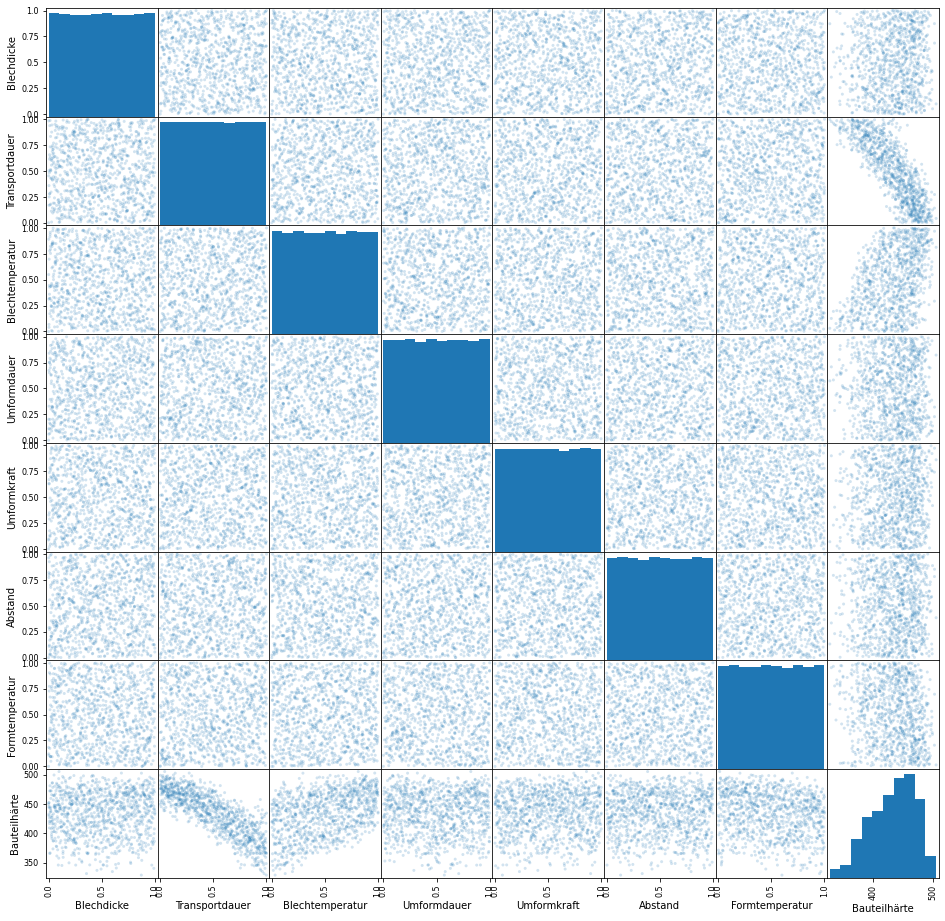

In [6]:
# 3. Code-Block

# Zeige Streudiagramm aller Variablenkombinationen an
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.2, figsize=(16, 16), diagonal="hist")
plt.show()

### 3.1 Daten vorbereiten - Aufteilen der Daten in Trainings- und Testdaten

Der Datensatz wird in einen Trainingsdatensatz und einen Testdatensatz aufgeteilt:
Übliche Werte sind für den Trainingsdatensatz 70 - 80% der Daten und für den Testdatensatz 20 - 30%.

Mit dem Trainingsdatensatz wird das Regressionsmodell trainiert, der Testdatensatz dient dazu das trainierte Modell zu testen.

TODO:
- Setze für train_size einen Wert zwischen 0.1 und 0.7 ein (4. Code-Block - Zeile 4)
- Beispiel: Ein Wert von 0.8 bedeutet der Datensatz wird in 80% Trainingsdaten und 20% Testdaten unterteilt.
- Ausführen des 4. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- Größe der Datensätze
- Ersten 3 Zeilen von X und von y

In [7]:
# 4. Code-Block

# Verhältnis Trainings- und Testdaten
train_size = 0.75

# Teile Datensatz in Trainings- und Testdatensatz auf
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["Bauteilhärte"]),
    df["Bauteilhärte"],
    test_size=(1 - train_size),
    random_state=my_seed,
)

# Ausgabe Datensätze und Anzahl Datenpunkte
print(
    "\nAnzahl Traingsdaten: \t"
    + str(len(y_train))
    + " / "
    + str(len(df))
    + " \t("
    + str("%.2f" % (100 * len(y_train) / len(df)))
    + "%)"
)
print(
    "Anzahl Testdaten: \t"
    + str(len(y_test))
    + " / "
    + str(len(df))
    + " \t("
    + str("%.2f" % (100 * len(y_test) / len(df)))
    + "%)"
)
print("\nX: \n" + str(X_train.head(3)))
print("\ny:\tBauteilhärte\n" + str(y_train.head(3)))


Anzahl Traingsdaten: 	749 / 999 	(74.97%)
Anzahl Testdaten: 	250 / 999 	(25.03%)

X: 
     Blechdicke  Transportdauer  Blechtemperatur  Umformdauer  Umformkraft  \
682    0.316991        0.856824         0.422273     0.914684     0.774193   
988    0.597891        0.662991         0.092043     0.296965     0.361055   
478    0.879584        0.812618         0.105028     0.810287     0.504903   

      Abstand  Formtemperatur  
682  0.612790        0.408436  
988  0.062045        0.437651  
478  0.834241        0.002005  

y:	Bauteilhärte
682    396.870828
988    397.791884
478    371.073631
Name: Bauteilhärte, dtype: float64


### 4.1 Modelle bilden - Mögliche Hyperparameter anzeigen

Vor der Erstellung eines Modells lassen wir uns zunächst alle einstellbaren Hyperparameter anzeigen.

TODO:
- Ausführen des 5. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- Mögliche Hyperparameter für die Erstellung des Linearen Modells

In [8]:
# 5. Code-Block

# Ausgabe möglicher Hyperparameter
from sklearn import linear_model

linear_model.LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

Beschreibung der Hyperparameter:
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

### 4.2 Modelle bilden - Modell erstellen (untrainiert)

Aufstellen des untrainierten Modells, als Hyperparameter wird 'fit_intercept' als True eingestellt, da wir ein Regressionsmodell __mit Konstante__ berechnen wollen.

TODO:
- Setze in die Klammer "fit_intercept=True" ein (6. Code-Block - Zeile 4)
- Ausführen des 6. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- Hyperparameter des erstellten Modells

In [10]:
# 6. Code-Block

# Erstellen des Modells
regr = linear_model.LinearRegression(fit_intercept=True)
regr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

### 4.3 Modelle bilden - Modelle anhand Trainingsdaten trainieren

Während des Trainings werden die Parameter des Modells/der Regressionsgerade angepasst sodass dieses die Daten des Trainingsdatensatzes abbildet (Gradientenverfahren). 

TODO:
- Ausführen des 7. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- Gleichung der Regressionsgeraden

In [17]:
# 7. Code-Block

# Trainieren des Lineares Regressionsmodells
regr = regr.fit(X_train, y_train)

# Ausgabe des Modells
regr_model = "y = " + str("%.3f" % regr.intercept_)

for i in range(len(regr.coef_)):
    regr_model += (
        " + " + str("%.3f" % regr.coef_[i]) + " * " + str(list(X_train)[i])
    )
print("\nRegressionsmodell: \n" + str(regr_model))

y = 461.389
[   2.27911633 -106.52765681   55.2827818     1.98014276    5.64882725
    1.9895389   -18.4092515 ]

Regressionsmodell: 
y = 461.389 + 2.279 * Blechdicke + -106.528 * Transportdauer + 55.283 * Blechtemperatur + 1.980 * Umformdauer + 5.649 * Umformkraft + 1.990 * Abstand + -18.409 * Formtemperatur


### 5. Validieren der Modelle - entfällt

Dieser Schritt ist nur nötig wenn mehrere Modelle erstellt werden.

### 6.1 Modell testen & anwenden - Berechnung der Modellvorhersage auf den Testdaten

Mit dem erstellten Modell wird eine Vorhersage für alle Testdaten berechnet und diese mit den realen Werten verglichen.

TODO:
- Ausführen des 8. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- Tabelle mit realer Bauteilhärte, Modell-Vorhersage der Bauteilhärte sowie die Abweichung

In [12]:
# 8. Code-Block

# Berechne Modellvorhersage für jede Zeile des Test-Datensatzes
results_test = pd.DataFrame(y_test)
results_test["Vorhersage_Bauteilhärte"] = regr.predict(X_test)

# Berechne Differenz: Realer Wert - Vorhersage
results_test["Abweichung_Vorhersage"] = (
    results_test["Bauteilhärte"] - results_test["Vorhersage_Bauteilhärte"]
)

# Ausgabe Tabelle
print("\nModell-Vorhersage und reale Werte der Testdaten:")
results_test.head(n=5)


Modell-Vorhersage und reale Werte der Testdaten:


,Bauteilhärte,Vorhersage_Bauteilhärte,Abweichung_Vorhersage
458,328.631002,349.509685,-20.878683
524,443.444879,446.529665,-3.084786
684,410.051871,406.109346,3.942525
542,426.622444,402.996434,23.626010
237,401.118768,396.787214,4.331553


### 6.2 Modell testen & anwenden - Bewertung der Modellgüte mittels Graph (Y/Y_pred)

Graph der Modell-Vorhersage über den realen Werten.

TODO:
- Ausführen des 9. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- Graph: Bauteilhärte über vorhergesagter Bauteilhärte

Text(0.5, 1.0, 'Lineare Regression - Testdatensatz')

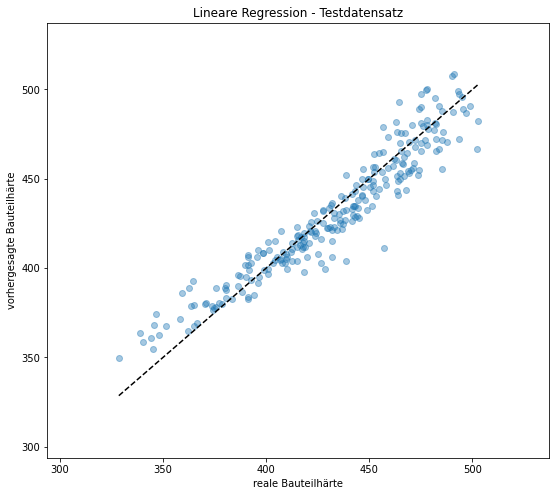

In [13]:
# 9. Code-Block

# Ausgabe Graph
min_test, max_test = y_test.min(), y_test.max()
fig = plt.figure(figsize=(9, 8))
plt.plot(y_test, np.squeeze(regr.predict(X_test)), "o", alpha=0.4)
plt.plot([min_test, max_test], [min_test, max_test], "--", c=(0, 0, 0))
plt.xlim(min_test - 0.2 * (max_test - min_test), max_test + 0.2 * (max_test - min_test))
plt.ylim(min_test - 0.2 * (max_test - min_test), max_test + 0.2 * (max_test - min_test))
plt.xlabel("reale Bauteilhärte")
plt.ylabel("vorhergesagte Bauteilhärte")
plt.title("Lineare Regression - Testdatensatz")

### 6.3 Modell testen & anwenden - Berechnung MAE

Um die Güte des Regressionsmodells zu bestimmen wird der MAE (Mean-Absolut-Error) berechnet. 

TODO:
- Ausführen des 10. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- MAE

In [14]:
# 10. Code-Block

# Berechne MAE
from sklearn.metrics import mean_absolute_error

y_pred = regr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

# Ausgabe
print("\nMAE: \t" + str("%.5f" % mae))


MAE: 	9.35666


### 6.4 Modell testen & anwenden - Erkenntnisse aus dem Modell/Nutzen

TODO:
- Ausführen des 11. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- Einflussgröße der Variablen auf die Bauteilhärte

Text(0.5, 1.0, 'Einfluss der Variablen auf die Bauteilhärte')

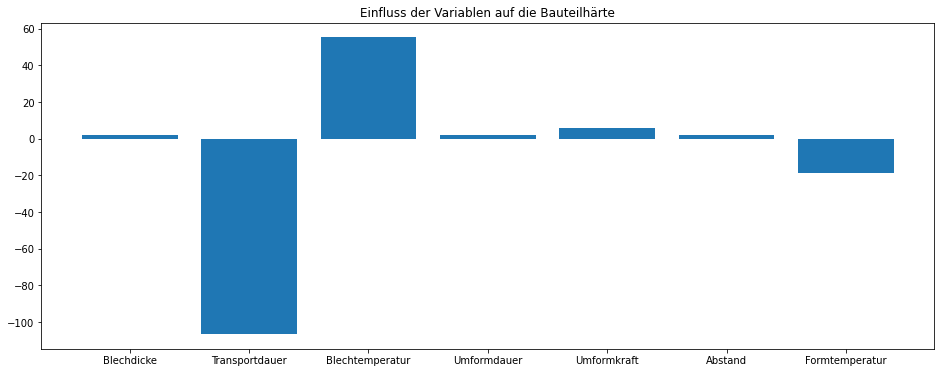

In [15]:
# 11. Code-Block

# Ausgabe Graph
fig = plt.figure(figsize=(16, 6))
plt.bar(list(X_train), regr.coef_, align="center")
plt.title("Einfluss der Variablen auf die Bauteilhärte")

### Verständnisfragen:

1. Welche Variable hat den größten/kleinsten Einfluss auf die Bauteilhärte?
2. Ist die lineare Regression bei diesem Problem sinnvoll? Wie würdest du das Modell bewerten?
3. Dein Unternehmen möchte die Bauteilhärte steigern, welche Möglichkeit ist vorzuziehen:
    - Möglichkeit 1: Die Umformkraft wird verdoppelt (zusäzliche Kosten neue Presse: 5000€)
    - Möglichkeit 2: Die Transportdauer wird halbiert (zusäzliche Kosten neuer Roboter: 8000€)